In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
from matplotlib import cm
from scipy.stats import linregress
from mpl_toolkits.basemap import Basemap
#from datetime import datetime
import re

In [2]:
#web api format
#localhost:8040/api/tide/const?lon=122.26672,123&lat=23.76175,24&mode=list&complex=amp,ph,hc&append=u,v&constituent=o1,p1,k1,n2,m2,s2&mode=row
def fetch_tide_data(lon, lat, constituent, append="z", complex="amp,ph", mode="row"):
    # Construct the API endpoint
    url = f"http://localhost:8040/api/tide/const?lon={lon}&lat={lat}&constituent={constituent}&mode={mode}&complex={complex}&append={append}"
    print(url)
    # Fetch the data
    response = requests.get(url)

    # Ensure we got a successful response
    if response.status_code != 200:
        print(f"Failed to get data. Status code: {response.status_code}")
        return None

    # Parse the JSON data
    data = response.json()
    return data

# Example usage:
#df = fetch_tide_data(122.26672, 23.76175, "o1")
#print(df)


In [3]:
pf4 = pd.read_csv('./test_paper4_z.csv')
pf4uv = pd.read_csv('./test_paper4_uv.csv')
print(pf4uv)

    Unnamed: 0 Location  O1_amp  O1_ph  P1_amp  P1_ph  K1_amp  K1_ph  N2_amp  \
0            0      WC1    5.42  260.9    2.61  314.2    7.89  307.2    5.69   
1            1      WC2    5.37  261.8    2.46  300.8    7.42  293.8    3.85   
2            2      WC3    4.11  254.1    1.76  300.5    5.33  293.5    2.77   
3            3      WC4    2.99  264.5    1.27  297.9    3.82  290.9    1.00   
4            4      EWC    6.13  237.8    3.09  288.5    9.33  281.4    4.91   
5            5      PHC    3.10  269.8    1.43  295.1    4.32  288.1    4.96   
6            6      WC1    2.96  245.6    1.57  314.7    4.73  307.6    3.07   
7            7      WC2    3.88  272.9    1.75  308.5    5.28  301.5    3.20   
8            8      WC3    3.61  256.1    1.66  309.3    5.03  302.3    1.98   
9            9      WC4    3.71  251.5    1.79  314.1    5.40  307.1    1.15   
10          10      EWC    3.82  256.6    2.39  296.8    7.24  289.8    2.66   
11          11      PHC    5.08  310.4  

In [4]:
loni = ','.join(pf4["longitude"].astype(str))
lati = ','.join(pf4["latitude"].astype(str))
#pattern = r'^(.*)_am$'
#matches = [re.match(pattern, col) for col in pf4.columns.astype(str)]
#parts = [match.group(1) for match in matches if match]
parts = [col.replace('_amp', '') for col in pf4.columns if col.endswith('_amp')]
cons = ','.join(parts).lower() #pf4.columns.str.replace(r'^(.*)_am$', r'\1', regex=True))
print(loni, lati)
print(cons)

120.1375,120.15,121.38,120.13916,120.92055,121.62361,120.28805,120.82277,118.416667,121.50777,119.9425,120.55,121.4,119.45,121.243333 23.61861,23.383333,23.097222,23.45,24.84861,23.98027,22.61444,21.90222,24.4,22.0575,26.16166,24.333333,25.183333,24.983333,25.11805
k1,m2,n2,o1,p1,s2


In [60]:
#print(pf4uv.loc[pf4uv.type=="u", ["latitude"]].astype(str))


             latitude
0   24.98333333333333
1   24.83333333333333
2               24.65
3  24.466666666666665
4                25.0
5               23.85


In [5]:
lonu = ','.join(pf4uv.loc[pf4uv.type=="u", ["longitude"]].astype(str)["longitude"].values)
latu = ','.join(pf4uv.loc[pf4uv.type=="u", ["latitude"]].astype(str)["latitude"].values)
print(lonu)

119.48333333333332,119.8,120.13333333333334,120.46666666666668,120.13333333333334,119.86666666666666


In [6]:
zf4_z = fetch_tide_data(loni, lati, cons, append="z", complex="amp,ph", mode="row,nearest")
print(zf4_z)

http://localhost:8040/api/tide/const?lon=120.1375,120.15,121.38,120.13916,120.92055,121.62361,120.28805,120.82277,118.416667,121.50777,119.9425,120.55,121.4,119.45,121.243333&lat=23.61861,23.383333,23.097222,23.45,24.84861,23.98027,22.61444,21.90222,24.4,22.0575,26.16166,24.333333,25.183333,24.983333,25.11805&constituent=k1,m2,n2,o1,p1,s2&mode=row,nearest&complex=amp,ph&append=z
[{'longitude': 118.416667, 'latitude': 24.4, 'grid_lon': 118.43333199547594, 'grid_lat': 24.400000965080963, 'type': 'z', 'k1_amp': 0.3225414733886719, 'k1_ph': 154.86505912747114, 'm2_amp': 1.7352939453125, 'm2_ph': 106.71189079961192, 'n2_amp': 0.334, 'n2_ph': 90.00000250447816, 'o1_amp': 0.27144244384765626, 'o1_ph': 125.85667198653671, 'p1_amp': 0.1060235824584961, 'p1_ph': 154.88516720438767, 's2_amp': 0.49102444458007816, 's2_ph': 155.83609346139352}, {'longitude': 119.45, 'latitude': 24.983333, 'grid_lon': 119.46666531712721, 'grid_lat': 24.966667654160716, 'type': 'z', 'k1_amp': 0.2994828796386719, 'k1_

In [7]:
zf4_uv = fetch_tide_data(lonu, latu, cons, append="u,v", complex="amp,ph", mode="row,nearest")
print(zf4_uv)

http://localhost:8040/api/tide/const?lon=119.48333333333332,119.8,120.13333333333334,120.46666666666668,120.13333333333334,119.86666666666666&lat=24.98333333333333,24.83333333333333,24.65,24.466666666666665,25.0,23.85&constituent=k1,m2,n2,o1,p1,s2&mode=row,nearest&complex=amp,ph&append=u,v
[{'longitude': 119.48333333333332, 'latitude': 24.98333333333333, 'grid_lon': 119.4999986500837, 'grid_lat': 24.966667654160716, 'type': 'u', 'k1_amp': 6.576826797207342, 'k1_ph': 269.317880163491, 'm2_amp': 12.372945069837614, 'm2_ph': 218.47680017079998, 'n2_amp': 5.90619367027568, 'n2_ph': 208.4853262453385, 'o1_amp': 5.352285038248521, 'o1_ph': 235.81585009590265, 'p1_amp': 2.30182734634879, 'p1_ph': 259.3634600142769, 's2_amp': 9.754153771048129, 's2_ph': 273.0557899792397}, {'longitude': 119.48333333333332, 'latitude': 24.98333333333333, 'grid_lon': 119.4999986500837, 'grid_lat': 24.966667654160716, 'type': 'v', 'k1_amp': 2.6421403959277585, 'k1_ph': 296.48636460618576, 'm2_amp': 28.23848373020

In [8]:
#No need anymore, now tide API can directly output wide-format in default
def data_to_wide(data): 
   # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Convert to wide format (use methods discussed earlier)
    wide_format = df.pivot_table(index=['longitude', 'latitude', 'type'], 
                                 columns=['constituents', 'variable'], 
                                 values='value').reset_index()
    # print(wide_format)
    # Rename columns (based on previous discussions)
    col_names = ['longitude', 'latitude', 'type'] + \
                [f"{c[0].upper()}_{c[1]}"for c in wide_format.columns[3:]]
    wide_format.columns = col_names
    wide_format.columns = wide_format.columns.str.replace(r'^(.*)_amplitude', r'\1_amp', regex=True)
    wide_format.columns = wide_format.columns.str.replace(r'^(.*)_phase', r'\1_ph', regex=True)

    return wide_format

In [9]:
zf4_zw = pd.DataFrame(zf4_z) #data_to_wide(zf4_z)
print(zf4_zw)

     longitude   latitude    grid_lon   grid_lat type    k1_amp       k1_ph  \
0   118.416667  24.400000  118.433332  24.400001    z  0.322541  154.865059   
1   119.450000  24.983333  119.466665  24.966668    z  0.299483  139.875990   
2   119.942500  26.161660  119.933332  26.166668    z  0.309845  119.377896   
3   120.137500  23.618610  120.133332  23.633334    z  0.209296  153.312516   
4   120.139160  23.450000  120.133332  23.433334    z  0.200242  156.763838   
5   120.150000  23.383333  120.166665  23.366668    z  0.197023  158.252587   
6   120.288050  22.614440  120.299999  22.600001    z  0.191481  163.931302   
7   120.822770  21.902220  120.833332  21.900001    z  0.164879  132.787962   
8   121.243333  25.118050  121.233332  25.133334    z  0.206930  122.768498   
9   121.380000  23.097222  121.366665  23.100001    z  0.167705  100.304846   
10  121.400000  25.183333  121.399999  25.166668    z  0.201189  120.133438   
11  121.507770  22.057500  121.499999  22.066668    

In [10]:
zf4_uvw = pd.DataFrame(zf4_uv)
print(zf4_uvw)

     longitude   latitude    grid_lon   grid_lat type    k1_amp       k1_ph  \
0   119.483333  24.983333  119.499999  24.966668    u  6.576827  269.317880   
1   119.483333  24.983333  119.499999  24.966668    v  2.642140  296.486365   
2   119.800000  24.833333  119.799999  24.833334    u  6.013045  279.597212   
3   119.800000  24.833333  119.799999  24.833334    v  4.413482  287.857042   
4   119.866667  23.850000  119.866665  23.833334    u  0.228179  273.361762   
5   119.866667  23.850000  119.866665  23.833334    v  4.633308  353.396115   
6   120.133333  24.650000  120.133332  24.633334    u  4.765531  281.782210   
7   120.133333  24.650000  120.133332  24.633334    v  4.281045  285.744943   
8   120.133333  25.000000  120.133332  25.000001    u  6.100016  270.328031   
9   120.133333  25.000000  120.133332  25.000001    v  4.786560  270.261566   
10  120.466667  24.466667  120.466665  24.466668    u  3.124765  281.252789   
11  120.466667  24.466667  120.466665  24.466668    

In [11]:
zf4 = pd.merge(pf4[["Location", "longitude", "latitude"]], zf4_zw, on=["longitude", "latitude"], how='left')
zf4["type"] = "z"
pf4["type"] = "z"
print(zf4)

     Location   longitude   latitude    grid_lon   grid_lat type    k1_amp  \
0    Boziliao  120.137500  23.618610  120.133332  23.633334    z  0.209296   
1       Budai  120.150000  23.383333  120.166665  23.366668    z  0.197023   
2   Chenggong  121.380000  23.097222  121.366665  23.100001    z  0.167705   
3     Dongshi  120.139160  23.450000  120.133332  23.433334    z  0.200242   
4     Hsinchu  120.920550  24.848610         NaN        NaN    z       NaN   
5     Hualien  121.623610  23.980270  121.633332  23.966668    z  0.176082   
6   Kaohsiung  120.288050  22.614440  120.299999  22.600001    z  0.191481   
7     Kenting  120.822770  21.902220  120.833332  21.900001    z  0.164879   
8      Kinmen  118.416667  24.400000  118.433332  24.400001    z  0.322541   
9       Lanyu  121.507770  22.057500  121.499999  22.066668    z  0.144845   
10      Matsu  119.942500  26.161660  119.933332  26.166668    z  0.309845   
11   Taichung  120.550000  24.333333         NaN        NaN    z

In [12]:
zf4uv = pd.merge(pf4uv[["Location", "longitude", "latitude", "type"]], zf4_uvw, on=["longitude", "latitude", "type"], how='left')
print(zf4uv)

   Location   longitude   latitude type    grid_lon   grid_lat    k1_amp  \
0       WC1  119.483333  24.983333    u  119.499999  24.966668  6.576827   
1       WC2  119.800000  24.833333    u  119.799999  24.833334  6.013045   
2       WC3  120.133333  24.650000    u  120.133332  24.633334  4.765531   
3       WC4  120.466667  24.466667    u  120.466665  24.466668  3.124765   
4       EWC  120.133333  25.000000    u  120.133332  25.000001  6.100016   
5       PHC  119.866667  23.850000    u  119.866665  23.833334  0.228179   
6       WC1  119.483333  24.983333    v  119.499999  24.966668  2.642140   
7       WC2  119.800000  24.833333    v  119.799999  24.833334  4.413482   
8       WC3  120.133333  24.650000    v  120.133332  24.633334  4.281045   
9       WC4  120.466667  24.466667    v  120.466665  24.466668  4.453067   
10      EWC  120.133333  25.000000    v  120.133332  25.000001  4.786560   
11      PHC  119.866667  23.850000    v  119.866665  23.833334  4.633308   

         k1

In [13]:
def plot_scatter_combined(paper_df, zarr_df, constituents, type):
    # Define a list of distinct colors
    colors = ['r', 'g', 'b', 'y', 'm', 'c']

    # Check if provided constituents and colors match
    if len(constituents) > len(colors):
        raise ValueError("Not enough colors defined for the number of constituents.")

    # Get a list of distinct markers and filter out unwanted ones
    all_markers = list(mlines.Line2D.markers.keys())
    usable_markers = [m for m in all_markers if m not in [' ', '', 'None', None, 'P', '_']]
    
    # Make sure the list of markers is repeated enough times
    locations = paper_df['Location'].unique()
    markers = usable_markers * (len(locations) // len(usable_markers) + 1)

    plt.figure(figsize=(10, 8))
    ax = plt.gca()  # Get current axis

    # To keep track and avoid adding duplicate legends
    added_constituents = set()
    added_locations = set()

    constituent_handles = []
    location_handles = []

    for j, location in enumerate(locations):
        for i, constituent in enumerate(constituents):
            for data_type in ['z', 'u', 'v']:
                # Filter dataframes by current location, constituent, and type
                paper_subset = paper_df[(paper_df['Location'] == location) & (paper_df['type'] == data_type)]
                zarr_subset = zarr_df[(zarr_df['Location'] == location) & (zarr_df['type'] == data_type)]

                if not paper_subset.empty and not zarr_subset.empty:
                    x = paper_subset[f"{constituent}_{type}"].values
                    y = zarr_subset[f"{constituent}_{type}"].values
                    x = np.nan_to_num(x)
                    y = np.nan_to_num(y)

                    # If first time for this constituent+type combination, calculate R2 over all locations
                    if (constituent, data_type) not in added_constituents:
                        df_merged = pd.merge(
                            paper_df[paper_df['type'] == data_type][['Location', f"{constituent}_{type}"]],
                            zarr_df[zarr_df['type'] == data_type][['Location', f"{constituent}_{type}"]],
                            on='Location', suffixes=('_paper', '_zarr')
                        )

                        x_all = df_merged[f"{constituent}_{type}_paper"].values
                        y_all_temp = df_merged[f"{constituent}_{type}_zarr"].values 
                        mask = ~np.isnan(x_all) & ~np.isnan(y_all_temp)  # remove NaNs
                        x_all = x_all[mask]
                        y_all = y_all_temp[mask]
                        corr_coef = np.corrcoef(x_all, y_all)[0, 1]
                        r_squared = corr_coef ** 2

                        label = f"{constituent} ({data_type}) (Correlation Coefficient: {corr_coef:.2f}, R-squared: {r_squared:.2f})"
                        constituent_handles.append(mlines.Line2D([], [], color=colors[i], marker='o', markersize=10, label=label, linestyle='None'))
                        added_constituents.add((constituent, data_type))

                    # Scatter plot
                    plt.scatter(x, y, color=colors[i], marker=markers[j])

                    # Create legends for locations
                    if location not in added_locations:
                        location_handles.append(mlines.Line2D([], [], color='black', marker=markers[j], markersize=10, label=location, linestyle='None'))
                        added_locations.add(location)

    # Legends
    leg1 = ax.legend(handles=constituent_handles, loc='upper left')
    ax.add_artist(leg1)
    plt.legend(handles=location_handles, loc='lower right')

    plt.title(f"Comparison of {type.upper()} between Paper Table and Zarr Dataset")
    plt.xlabel("Paper Table Values")
    plt.ylabel("Zarr Dataset Values")
    plt.show()


In [14]:
#parts = [col.replace('_amp', '') for col in pf4.columns if col.endswith('_amp')]
print(parts)
constituents = parts
zf4.columns = zf4.columns.str.replace(r'^(.*)_(amp|ph)$', lambda x: x.group(1).upper() + '_' + x.group(2), regex=True)
print(zf4.columns)

['K1', 'M2', 'N2', 'O1', 'P1', 'S2']
Index(['Location', 'longitude', 'latitude', 'grid_lon', 'grid_lat', 'type',
       'K1_amp', 'K1_ph', 'M2_amp', 'M2_ph', 'N2_amp', 'N2_ph', 'O1_amp',
       'O1_ph', 'P1_amp', 'P1_ph', 'S2_amp', 'S2_ph'],
      dtype='object')


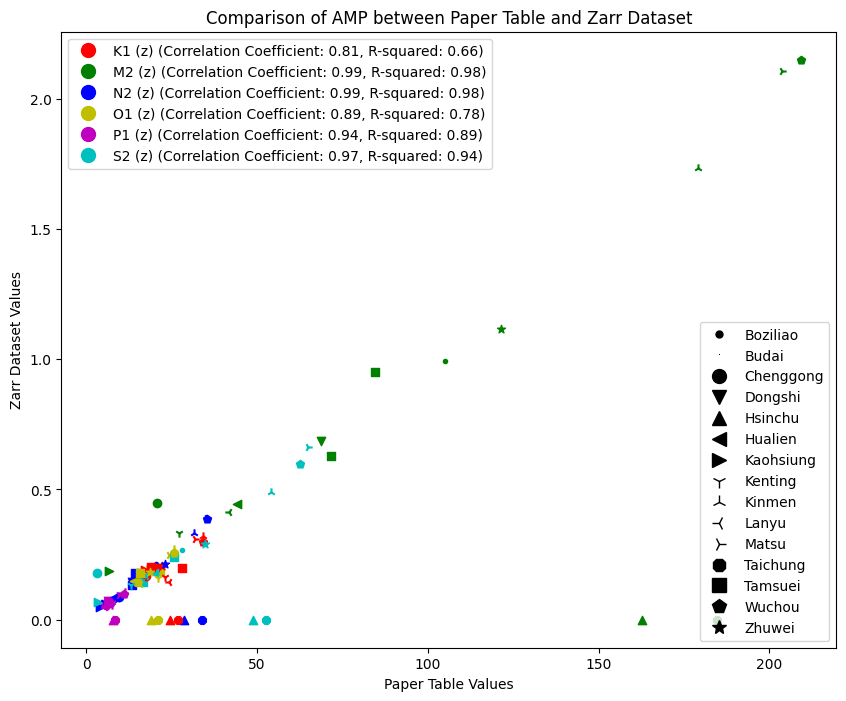

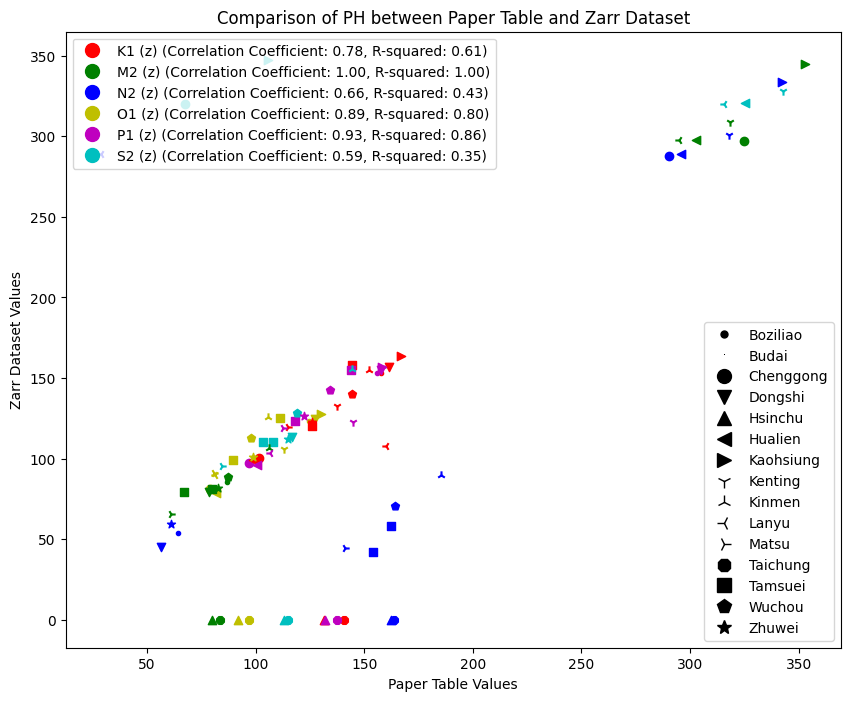

In [15]:
# For amplitude comparison
plot_scatter_combined(pf4, zf4, constituents, "amp")

# For phase comparison
plot_scatter_combined(pf4, zf4, constituents, "ph")

In [142]:
print(pf4uv)


    Unnamed: 0 Location  O1_amp  O1_ph  P1_amp  P1_ph  K1_amp  K1_ph  N2_amp  \
0            0      WC1    5.42  260.9    2.61  314.2    7.89  307.2    5.69   
1            1      WC2    5.37  261.8    2.46  300.8    7.42  293.8    3.85   
2            2      WC3    4.11  254.1    1.76  300.5    5.33  293.5    2.77   
3            3      WC4    2.99  264.5    1.27  297.9    3.82  290.9    1.00   
4            4      EWC    6.13  237.8    3.09  288.5    9.33  281.4    4.91   
5            5      PHC    3.10  269.8    1.43  295.1    4.32  288.1    4.96   
6            6      WC1    2.96  245.6    1.57  314.7    4.73  307.6    3.07   
7            7      WC2    3.88  272.9    1.75  308.5    5.28  301.5    3.20   
8            8      WC3    3.61  256.1    1.66  309.3    5.03  302.3    1.98   
9            9      WC4    3.71  251.5    1.79  314.1    5.40  307.1    1.15   
10          10      EWC    3.82  256.6    2.39  296.8    7.24  289.8    2.66   
11          11      PHC    5.08  310.4  

In [16]:
zf4uv.columns = zf4uv.columns.str.replace(r'^(.*)_(amp|ph)$', lambda x: x.group(1).upper() + '_' + x.group(2), regex=True)
print(zf4uv)

   Location   longitude   latitude type    grid_lon   grid_lat    K1_amp  \
0       WC1  119.483333  24.983333    u  119.499999  24.966668  6.576827   
1       WC2  119.800000  24.833333    u  119.799999  24.833334  6.013045   
2       WC3  120.133333  24.650000    u  120.133332  24.633334  4.765531   
3       WC4  120.466667  24.466667    u  120.466665  24.466668  3.124765   
4       EWC  120.133333  25.000000    u  120.133332  25.000001  6.100016   
5       PHC  119.866667  23.850000    u  119.866665  23.833334  0.228179   
6       WC1  119.483333  24.983333    v  119.499999  24.966668  2.642140   
7       WC2  119.800000  24.833333    v  119.799999  24.833334  4.413482   
8       WC3  120.133333  24.650000    v  120.133332  24.633334  4.281045   
9       WC4  120.466667  24.466667    v  120.466665  24.466668  4.453067   
10      EWC  120.133333  25.000000    v  120.133332  25.000001  4.786560   
11      PHC  119.866667  23.850000    v  119.866665  23.833334  4.633308   

         K1

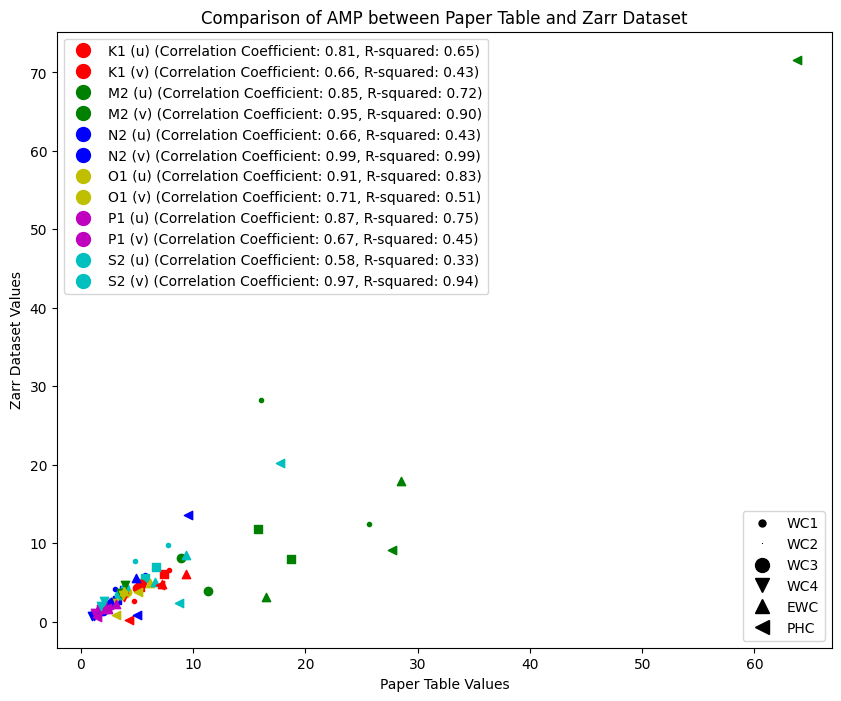

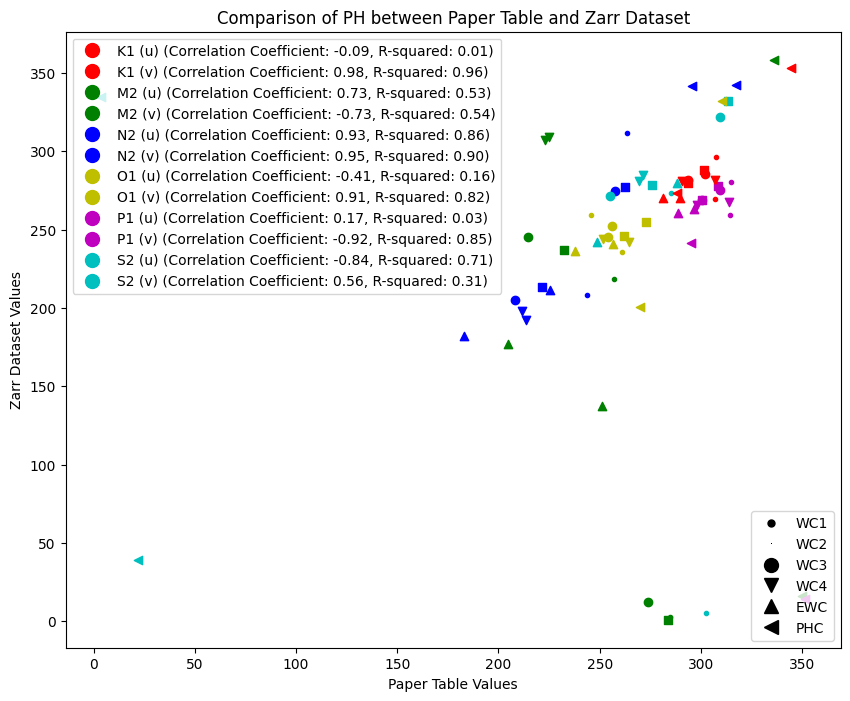

In [17]:
# For amplitude comparison
plot_scatter_combined(pf4uv, zf4uv, constituents, "amp")

# For phase comparison
plot_scatter_combined(pf4uv, zf4uv, constituents, "ph")